In [39]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

In [40]:
df_hospital = pd.read_csv('../data/hospital_visits.csv')
df_hospital['Week'] = df_hospital.Week.map(str) + "-" + df_hospital.Year.map(str)
df_hospital = df_hospital[['Total ILI']]
list_data = list(df_hospital['Total ILI'])

In [41]:
list_data = list(df_hospital['Total ILI'])

In [54]:
model = ExponentialSmoothing(list_data, seasonal='add', seasonal_periods=52)
model_fit = model.fit()

C:\Users\steph\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [55]:
# make prediction
future = 52
# predictions = model_fit.predict(len(list_data), len(list_data) + future)
predictions = model_fit.forecast(future)
print(predictions)
future_weeks = list(range(len(list_data) - 1, len(list_data) + future))
# future_weeks

[33568.76734501 34406.61630902 41165.04019126 45678.90497859
 51877.49570922 55484.55296114 54187.94274305 49514.17051841
 48388.85504403 47382.6735391  47582.98171797 44670.10351731
 44838.91230686 40119.48233957 37024.54323379 33302.83797749
 34723.53713781 33433.78683247 33171.13275395 31521.45309201
 30137.5639317  28725.94152167 27680.08890444 27613.42142353
 27089.19486954 26301.69548023 25674.2192316  24721.21557838
 23953.02556748 23299.57611273 22814.51765036 22276.44091098
 22170.62483683 21512.74663618 21620.39828285 21293.94152167
 21276.55297206 21218.9135064  21374.58464054 21581.94517489
 22227.66015853 22457.81850095 22806.44213236 23565.40193607
 25439.58343008 23857.04990769 29658.75152169 28104.5992534
 28821.00485864 29643.75273215 29788.7454148  31801.99999497]


In [56]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions')

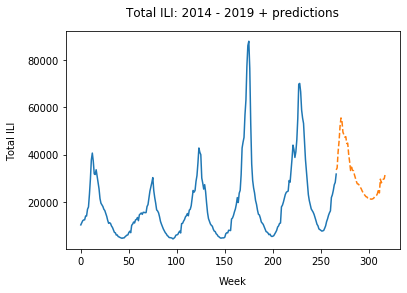

In [57]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions", pad=15)

In [12]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,267
Model:,ExponentialSmoothing,SSE,2865386420.113
Optimized:,True,AIC,4430.388
Trend:,None,BIC,4624.100
Seasonal:,Additive,AICC,4460.788
Seasonal Periods:,52,Date:,"Mon, 09 Dec 2019"
Box-Cox:,False,Time:,02:22:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,0.000000,gamma,True
